<a href="https://colab.research.google.com/github/rwiddhi-b/CodeClause_FlightDelayPrediction/blob/main/Prediction_of_flight_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/content/flights.csv")
airlines=pd.read_csv("/content/airlines.csv")
airports=pd.read_csv("/content/airports.csv")

In [4]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [6]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [7]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,10492.0,10492.0,10492.0,10492.0,10492.000000,10492.000000,10096.000000,10095.000000,10093.000000,10093.000000,...,10491.000000,10087.000000,10074.000000,10491.000000,10491.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000
mean,2015.0,1.0,1.0,4.0,2174.397350,1175.463877,1192.548336,7.650817,14.940850,1217.707718,...,1416.688590,1427.230197,2.827576,0.001525,0.038223,9.289176,0.130318,20.607970,16.285945,1.631125
std,0.0,0.0,0.0,0.0,1849.834202,340.938632,348.975717,31.124583,6.909411,346.946259,...,360.899624,368.128977,33.409509,0.039025,0.191744,13.607445,2.857656,46.916853,35.407733,12.237245
min,2015.0,1.0,1.0,4.0,1.000000,5.000000,2.000000,-27.000000,3.000000,14.000000,...,5.000000,1.000000,-54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,1.0,4.0,700.000000,910.000000,920.000000,-4.000000,11.000000,936.000000,...,1130.000000,1139.500000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,1.0,4.0,1574.000000,1202.000000,1216.000000,-1.000000,13.000000,1230.000000,...,1429.000000,1435.000000,-4.000000,0.000000,0.000000,3.000000,0.000000,8.000000,0.000000,0.000000
75%,2015.0,1.0,1.0,4.0,3274.000000,1450.000000,1502.000000,8.000000,17.000000,1516.000000,...,1710.000000,1719.000000,8.000000,0.000000,0.000000,16.000000,0.000000,23.000000,19.000000,0.000000
max,2015.0,1.0,1.0,4.0,7438.000000,1740.000000,2354.000000,1190.000000,113.000000,2219.000000,...,2359.000000,2400.000000,1201.000000,1.000000,1.000000,164.000000,107.000000,1169.000000,467.000000,213.000000


In [8]:
data.shape

(10492, 31)

In [9]:
data.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER               13
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME           396
DEPARTURE_DELAY          397
TAXI_OUT                 399
WHEELS_OFF               399
SCHEDULED_TIME             1
ELAPSED_TIME             418
AIR_TIME                 418
DISTANCE                   1
WHEELS_ON                405
TAXI_IN                  405
SCHEDULED_ARRIVAL          1
ARRIVAL_TIME             405
ARRIVAL_DELAY            418
DIVERTED                   1
CANCELLED                  1
CANCELLATION_REASON    10091
AIR_SYSTEM_DELAY        8635
SECURITY_DELAY          8635
AIRLINE_DELAY           8635
LATE_AIRCRAFT_DELAY     8635
WEATHER_DELAY           8635
dtype: int64

In [10]:
data1 = data.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [11]:
data1.shape

(10074, 31)

In [12]:
## Creting Dataset w.r.t different Types of Delays
Flight_Delays = data1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
Flight_Delays = Flight_Delays.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
        'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF', 'WHEELS_ON','AIR_TIME'],axis = 1)

In [13]:
Flight_Delays.head()

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,ELAPSED_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,NK,MSP,FLL,12.0,14.0,220.0,1487.0,40.0,25.0,25.0,0.0,0.0,0.0,0.0
30,NK,PHX,ORD,72.0,9.0,175.0,1440.0,10.0,43.0,43.0,0.0,0.0,0.0,0.0
35,HA,LAS,HNL,0.0,16.0,385.0,2762.0,8.0,15.0,0.0,0.0,15.0,0.0,0.0
50,B6,BQN,MCO,-3.0,25.0,196.0,1129.0,11.0,20.0,20.0,0.0,0.0,0.0,0.0
52,B6,SJU,MCO,95.0,9.0,175.0,1189.0,3.0,85.0,0.0,0.0,85.0,0.0,0.0


In [14]:
Flight_Delays.shape

(1857, 14)

In [15]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays\n",
data2 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [16]:
data2.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [17]:
data2.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330.0,737.0,4.0,750.0,741.0,-9.0,0.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296.0,800.0,11.0,806.0,811.0,5.0,0.0,0.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342.0,748.0,8.0,805.0,756.0,-9.0,0.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0


In [18]:
# Creating a function to change the way of representation of time in the column
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [19]:
# Applying the function to required variables in the dataset
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Scheduled_Arrival'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
data2['Scheduled_Departure'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data2['Actual_Arrival'] =data1['ARRIVAL_TIME'].apply(Format_Hourmin)

In [20]:
data2['Actual_Departure']

0        23:54:00
1        00:02:00
2        00:18:00
3        00:15:00
4        00:24:00
           ...   
10486    17:34:00
10487    17:28:00
10488    17:44:00
10489    17:31:00
10490    17:59:00
Name: Actual_Departure, Length: 10074, dtype: object

In [21]:
# Creating Date in the Datetime format
data2['Date'] = pd.to_datetime(data2[['YEAR','MONTH','DAY']])
data2.Date


0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
10486   2015-01-01
10487   2015-01-01
10488   2015-01-01
10489   2015-01-01
10490   2015-01-01
Name: Date, Length: 10074, dtype: datetime64[ns]

In [22]:
data2['Day'] = data2['Date'].dt.day_name()

In [23]:
# Merging 3 data sets
data2 = data2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
data2 = data2.drop(['AIRLINE_x','IATA_CODE'], axis=1)
data2 = data2.rename(columns={"AIRLINE_y":"AIRLINE"})
data2 = data2.merge(airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
data2 = data2.merge(airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [24]:
data2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'Actual_Departure', 'Scheduled_Arrival',
       'Scheduled_Departure', 'Actual_Arrival', 'Date', 'Day', 'AIRLINE',
       'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [25]:
data2 = data2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)
data2 = data2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [26]:
data2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Actual_Arrival,Date,Day,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,04:08:00,2015-01-01,Thursday,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,04:55:00,2015-01-01,Thursday,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,134,N464AS,ANC,SEA,155,140.0,...,05:58:00,2015-01-01,Thursday,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,114,N303AS,ANC,SEA,220,209.0,...,06:28:00,2015-01-01,Thursday,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,730,N423AS,ANC,SEA,505,457.0,...,09:16:00,2015-01-01,Thursday,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,2015,1,1,4,5006,N919EV,ATL,DHN,1350,1349.0,...,13:40:00,2015-01-01,Thursday,Atlantic Southeast Airlines,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,DHN,Dothan Regional Airport,Dothan
10070,2015,1,1,4,5613,N837AS,ATL,VLD,1415,1411.0,...,15:06:00,2015-01-01,Thursday,Atlantic Southeast Airlines,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,VLD,Valdosta Regional Airport,Valdosta
10071,2015,1,1,4,5531,N857AS,ATL,BQK,1523,1520.0,...,16:17:00,2015-01-01,Thursday,Atlantic Southeast Airlines,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,BQK,Brunswick Golden Isles Airport,Brunswick
10072,2015,1,1,4,5315,N928SW,JMS,DVL,1318,1513.0,...,16:09:00,2015-01-01,Thursday,Skywest Airlines Inc.,JMS,Jamestown Regional Airport,Jamestown,DVL,Devils Lake Regional Airport,Devils Lake


In [27]:
Flights = pd.DataFrame(data2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [28]:
Flights = Flights.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [29]:
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0.0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,00:41:00,2015-01-01,...,-4.0,04:55:00,05:09:00,-14.0,204.0,194.0,173.0,4.0,17.0,0.0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,01:40:00,2015-01-01,...,-15.0,05:58:00,06:33:00,-35.0,218.0,198.0,170.0,11.0,17.0,0.0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,02:09:00,2015-01-01,...,-11.0,06:28:00,06:40:00,-12.0,200.0,199.0,176.0,8.0,15.0,0.0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448.0,04:57:00,2015-01-01,...,-8.0,09:16:00,09:30:00,-14.0,205.0,199.0,179.0,4.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,Atlantic Southeast Airlines,Hartsfield-Jackson Atlanta International Airport,Atlanta,Dothan Regional Airport,Dothan,ATL,DHN,170.0,13:49:00,2015-01-01,...,-1.0,13:40:00,13:47:00,-7.0,57.0,51.0,33.0,2.0,16.0,0.0
10070,Atlantic Southeast Airlines,Hartsfield-Jackson Atlanta International Airport,Atlanta,Valdosta Regional Airport,Valdosta,ATL,VLD,208.0,14:11:00,2015-01-01,...,-4.0,15:06:00,15:15:00,-9.0,60.0,55.0,38.0,2.0,15.0,0.0
10071,Atlantic Southeast Airlines,Hartsfield-Jackson Atlanta International Airport,Atlanta,Brunswick Golden Isles Airport,Brunswick,ATL,BQK,238.0,15:20:00,2015-01-01,...,-3.0,16:17:00,16:30:00,-13.0,67.0,57.0,39.0,2.0,16.0,0.0
10072,Skywest Airlines Inc.,Jamestown Regional Airport,Jamestown,Devils Lake Regional Airport,Devils Lake,JMS,DVL,83.0,15:13:00,2015-01-01,...,115.0,16:09:00,13:56:00,133.0,38.0,56.0,24.0,5.0,27.0,0.0


### Plot the count of top 20 most frequent 'Origin_city' values.

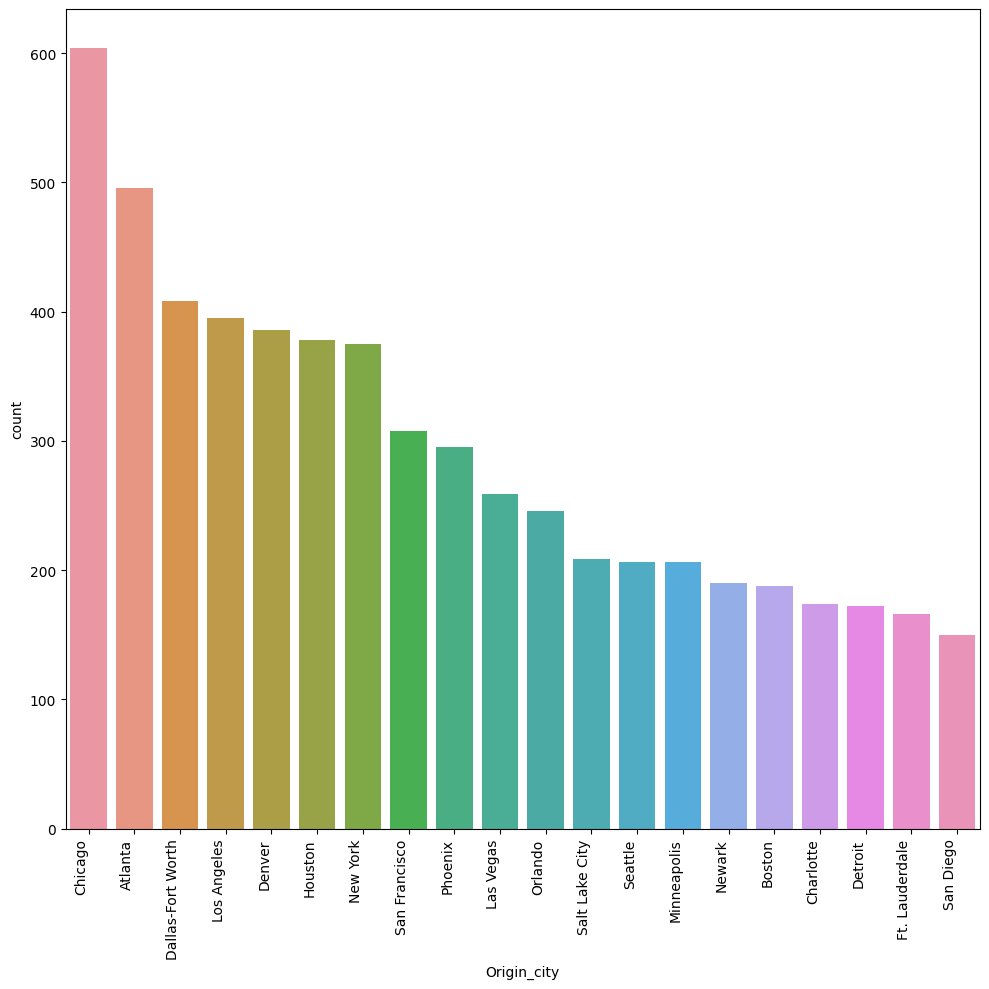

In [30]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Origin_city'], data = Flights, order=Flights['Origin_city'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()
# Thus maximum flights start from Atlanta

In [ ]:
# delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
# df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)
# fig = plt.figure(1, figsize=(10,7))
# ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)

In [ ]:
# #We replace the abbreviations by the full names of the companies and set the labels
# labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
# ax.set_yticklabels(labels)
# plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0)
# plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0)
# ax.yaxis.label.set_visible(False)
# plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)

In [ ]:
# # Set the legend
# L = plt.legend()
# L.get_texts()[0].set_text('on time (t < 5 min)')
# L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
# L.get_texts()[2].set_text('large delay (t > 45 min)')
# plt.show()


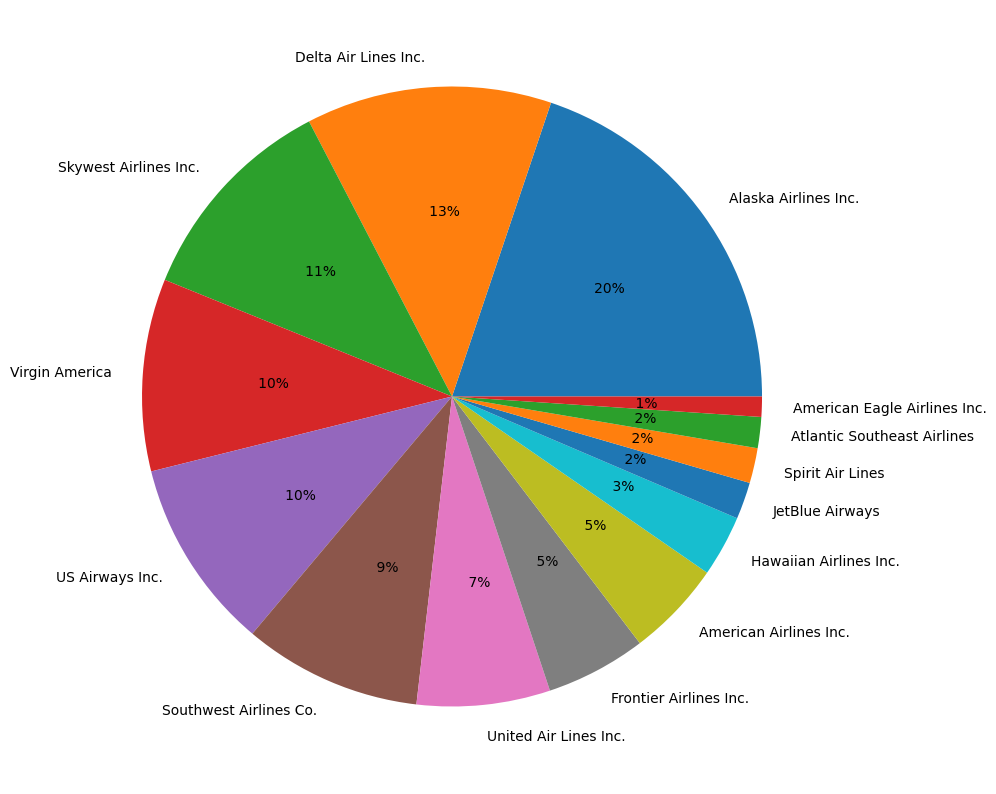

In [32]:
axis = plt.subplots(figsize=(10,14))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

<ipython-input-33-f0a38ffb4b24>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax3 = sns.stripplot(y="AIRLINE", x="ARRIVAL_DELAY", size = 4, palette = colors, data=Flights, linewidth = 0.5,  jitter=True)
<ipython-input-33-f0a38ffb4b24>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])


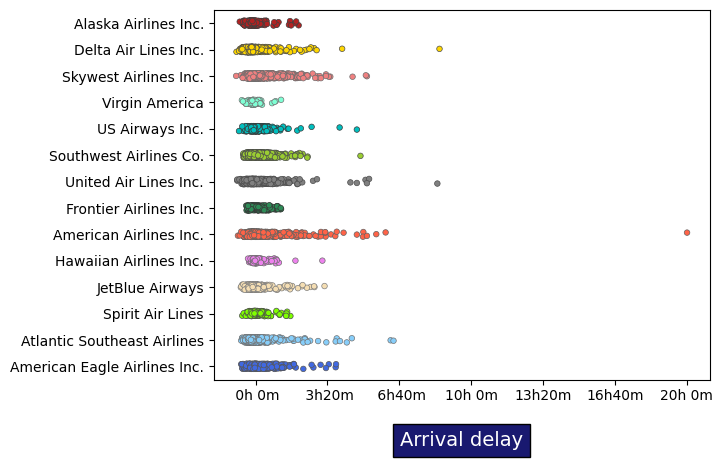

In [33]:
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
ax3 = sns.stripplot(y="AIRLINE", x="ARRIVAL_DELAY", size = 4, palette = colors, data=Flights, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=10)
plt.setp(ax3.get_yticklabels(), fontsize=10)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Arrival delay', fontsize=14, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

In [ ]:
# axis = plt.subplots(figsize=(10,14))
# sns.despine(bottom=True, left=True)
# # Observations with Scatter Plot
# sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE", palette = colors, data = Flights,linewidth = 0.5, dodge=True, jitter=True)
# plt.show()

<ipython-input-34-5655f4a2d38b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Flights.corr(),annot = True)


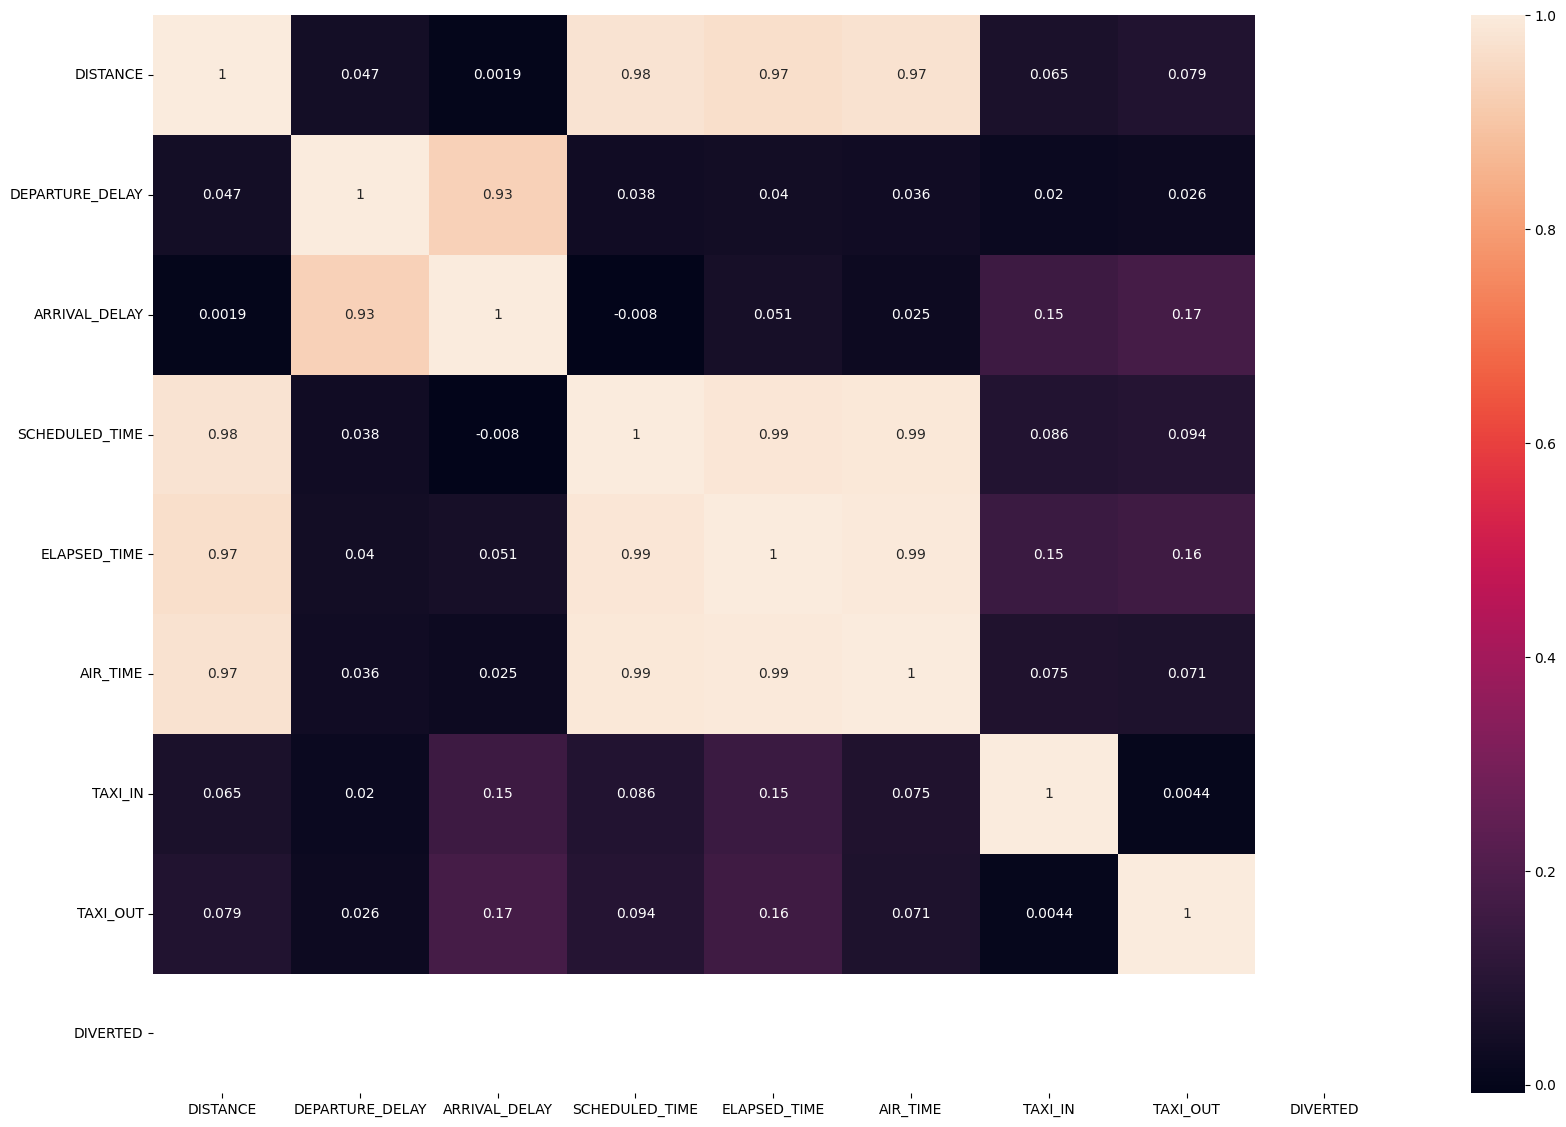

In [34]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(Flights.corr(),annot = True)
plt.show()

In [35]:
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [36]:
abbr_companies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

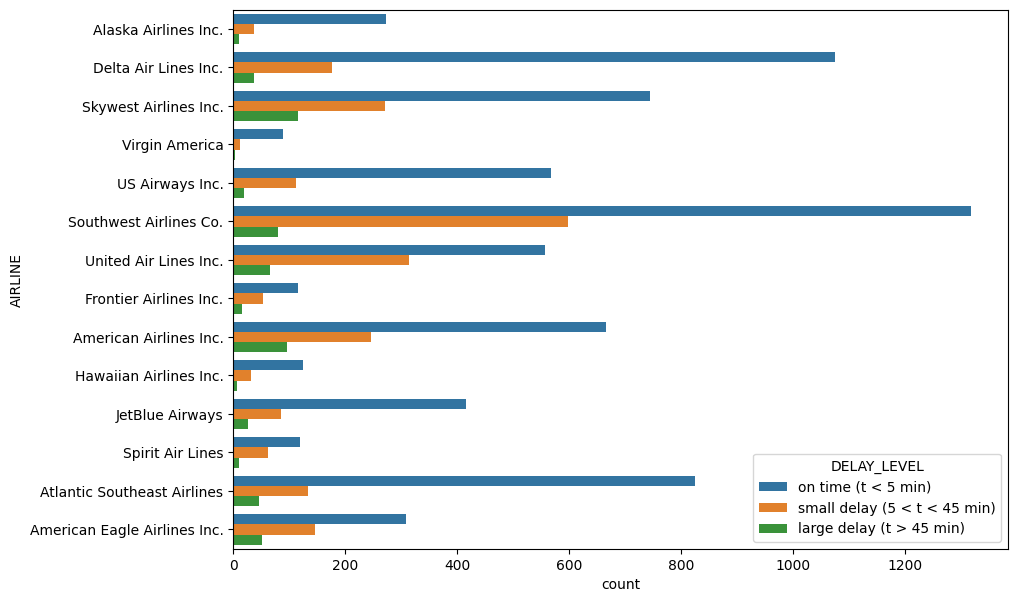

In [37]:
# delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
delay_type = lambda x: (("on time (t < 5 min)", "small delay (5 < t < 45 min)")[x > 5], "large delay (t > 45 min)")[x > 45]
Flights['DELAY_LEVEL'] = Flights['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=Flights)
